In [42]:
#  라이브러리 로드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 
train = pd.read_csv("./datasets/train.csv")

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

# EDA & 데이터 전처리

- 데이터 확인 
- 기술통계 확인 
- 결측치 확인 & 처리
- 무한대 값, 중복된는 값 확인 & 처리 
- 이상치 확인 & 처리
- 변수간 상관관계 분석
- 데이터 스케일링
---

## 데이터 확인

    데이터 행 열 수 확인 
    df.shape

    데이터 컬럼명 확인
    df.columns

    데이터 컬럼별 정보 확인 (데이터 타입, non-null의 수)
    df.info()



In [43]:
# 데이터 확인 
print(train.shape)
print(train.columns)
print(train.info())

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [44]:
# 시각화를 통한 데이터 확인

# train["Fare"].hist()

# train["Fare"].plot(kind="bar")

train.boxplot()

# plt.boxplot(train["Fare"])

<Axes: >

---
## 데이터의 기술 통계량 확인

    df.describe()

- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 

In [45]:
# 데이터 기술 통계량 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
# 문자열 데이터 확인
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

---
## 결측치 확인 & 처리

    전체 결측치 확인 
    df.isna().sum().sum()

    컬럼별 결측치 확인 
    df.isna().sum()

    결측치 데이터 데이터프레임 형식으로 보기
    df[df.isna().any(axis=1)]
    
    삭제
    df.dropna(axis = 0, inplace = True)
    
    대체(중앙값, 평균값, 최빈값)
    df.fillna("", inplace = True)

    최빈값
    from statistics import mode
    mode(df[col])

In [47]:
# 결측치 확인

train.isna().sum().sum()

866

In [48]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# 결측치 처리
#  Age는 평균값 Cabin는 최빈값으로 Embarked의 결측치는 삭제해봅시다! 

train['Age'].fillna(train['Age'].mean, inplace = True)

from statistics import mode
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace = True)

train['Embarked'].dropna(axis = 0, inplace = True)

In [50]:
train.dropna(axis = 0, inplace = True)

In [51]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

---
## 무한대 값 확인 
df[df.isin(np.abs([np.inf])).any(axis=1)]

In [52]:
# 데이터 무한대값 확인
train[train.isin(np.abs([np.inf])).any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
# 무한대 값을 가지는 데이터 처리

--- 
## 이상치 확인 & 처리 

### IQR을 이용한 이상치 확인 & 처리


    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index

In [54]:
train_1 = train.copy()
len(train['Fare'])

889

In [55]:
win = train_1.select_dtypes('number')

quantile_25 = np.percentile(win['Fare'].values, 25)
quantile_75 = np.percentile(win['Fare'].values, 75)

IQR = quantile_75 - quantile_25
IQR_weight = IQR * 1.5

lowest = quantile_25 - IQR_weight
highest = quantile_75 + IQR_weight

outlier_idx = win['Fare'][(win['Fare'] < lowest) | (win['Fare'] > highest)].index

In [56]:
train_1.drop(index = outlier_idx, axis = 0, inplace = True)
len(train_1['Fare'])

775

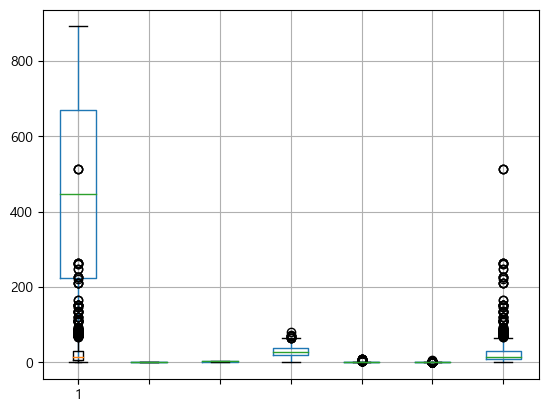

In [57]:
plt.boxplot(train["Fare"])
plt.show()

In [58]:
np.argmax(train["Fare"])

257

---
### 윈저라이징 (Winsorizing)
### 이상치를 제거하는 대신 이상치 값을 분포의 상/하한값으로 대체하는 방식

plt.boxplot(df[col])

    from scipy.stats.mstats  import winsorize
    winsorize(df[col],limits=[0.005, 0.005])

plt.boxplot(df[col])

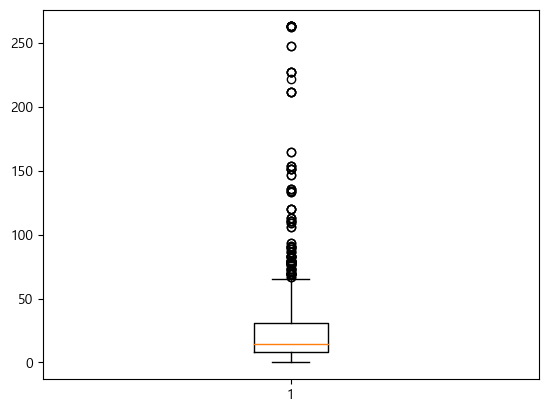

In [59]:
train_1 = train.copy()

quantile_5 = np.percentile(train_1["Fare"].values, 99.5)
quantile__5 = np.percentile(train_1["Fare"].values, 0.5)

train_1.loc[train_1["Fare"] > quantile_5, 'Fare'] = quantile_5
train_1.loc[train_1["Fare"] < quantile__5, 'Fare'] = quantile__5

plt.boxplot(train_1["Fare"])
plt.show()

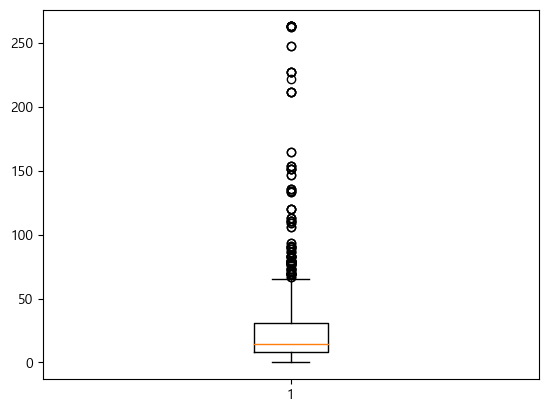

In [60]:
train_1 = train.copy()

quantile_5 = np.percentile(train_1["Fare"].values, 99.5)
quantile__5 = np.percentile(train_1["Fare"].values, 0.5)


for i in train_1.index:
    if train_1.loc[i, "Fare"] > quantile_5:
        train_1.loc[i, "Fare"] = quantile_5
    elif train_1.loc[i, "Fare"] < quantile__5:
        train_1.loc[i, "Fare"] = quantile__5
    else:
        pass

plt.boxplot(train_1["Fare"])
plt.show()

In [61]:
from scipy.stats.mstats import winsorize

train_1["Fare"] =  winsorize(train_1["Fare"], limits = [0.05, 0.05])

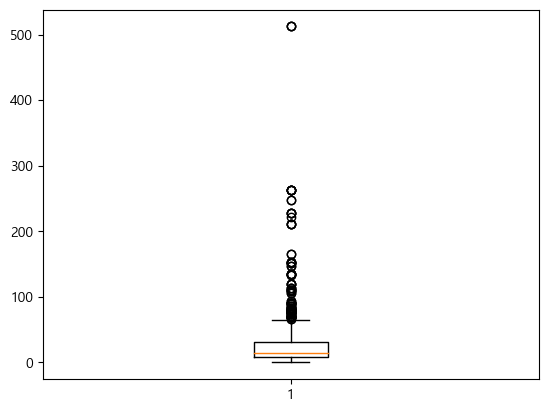

In [62]:
plt.boxplot(train["Fare"])
plt.show()

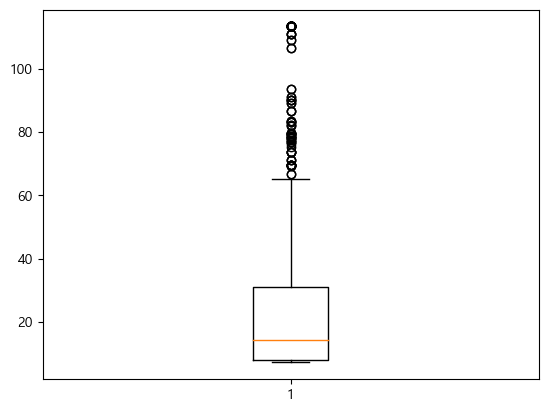

In [63]:
plt.boxplot(train_1["Fare"])
plt.show()

---
### isolation forest



![Untitled](https://github.com/juno-bara/Ubion_Hackathon/assets/124761676/91a51b10-6bd1-4b36-8b6f-5aa5e9b94c4a)



    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
    clf.fit(df)

    이상치가 아닌 값 추출해서 데이터프레임 
    sklearn에서는 predict를 한 결과는 이상치는 -1, 정상치는 1로 반환하여 리턴해줌
    isol_df = df[clf.predict(df) != -1]



In [64]:
train_1 = train.copy()
train_1 = train_1.select_dtypes("float")

In [65]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, contamination = 0.1, random_state = 42)
clf.fit(train_1)

isol_train = train_1[clf.predict(train_1) != -1]
isol_train

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


---
### KMeans


    # KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
    from sklearn.cluster import KMeans
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df)
    df[clf.predict(df)==0]

    # 군집화 평가를 위해 실루엣 계수 이용
    from sklearn.metrics import silhouette_score
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df_수치)
    df_km = df_수치[clf.predict(df_수치)==0]
    label = clf.labels_
    score_samples = silhouette_score(df_수치,label)
    print('silhouette:',score_samples)

In [66]:
# KMeans 클러스터링을 이용해서 이상치 제거 

train_1 = train.copy()
train_1 = train_1.select_dtypes('float')

from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2, random_state = 156)
clf.fit(train_1)
train_1[clf.predict(train_1) == 0]

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [67]:
# 군집화 평가를 위해 실루엣 계수 이용

from sklearn.metrics import silhouette_score
clf = KMeans(n_clusters = 2, random_state = 156)
clf.fit(train_1.select_dtypes('float'))
df_km = train_1.select_dtypes('float')[clf.predict(train_1.select_dtypes('float')) == 0]
label = clf.labels_
score_samples = silhouette_score(train_1.select_dtypes('float'), label)
print('silhouette :', score_samples)

C:\Users\이은진\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette : 0.8357342551494303


---
## 데이터 상관관계 분석

    df.corr("pearson")
    df.corr("kendall")
    df.corr("spearman")


    colormap = plt.cm.PuBu
    upp_mat = np.triu(df.corr())
    plt.figure(figsize=(10, 10))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family="Malgun Gothic")
    plt.title("Correlation of Features", y=1.05, size=15)
    sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
                cmap=colormap, linecolor="white", annot=True, mask=upp_mat)


    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns 

    VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    vif

In [68]:
# 상관계수 확인
train.select_dtypes('number').corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000


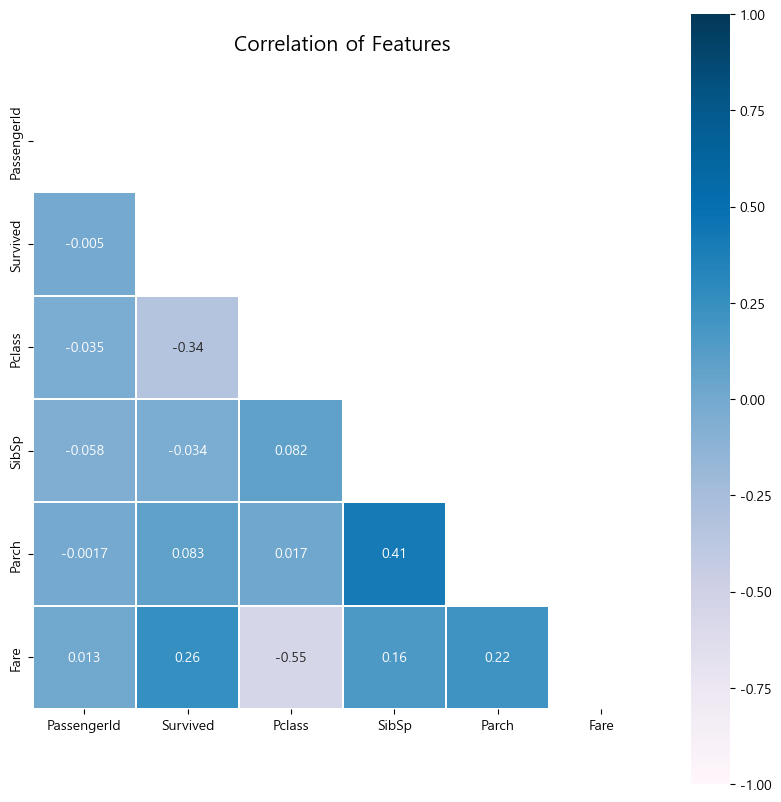

In [69]:
# 히트맵 확인

colormap = plt.cm.PuBu
upp_mat = np.triu(train.select_dtypes('number').corr("pearson"))
plt.figure(figsize = (10, 10))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(train.select_dtypes(exclude="object").corr("pearson"), linewidths = 0.1, vmax = 1.0, vmin = -1.0, square = True,
                cmap = colormap, linecolor = "white", annot = True, mask = upp_mat)
plt.show()


In [71]:
# VIF 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(train.select_dtypes('number').values, i) for i in range(train.select_dtypes('number').shape[1])]
vif["features"] = train.select_dtypes('number').columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by = "VIF Factor", ascending = False)
vif = vif.reset_index().drop(columns = 'index')
vif

,VIF Factor,features
0,3.380779,PassengerId
1,3.295772,Pclass
2,1.627675,Fare
3,1.626236,Survived
4,1.541573,Parch
5,1.536913,SibSp


---
## 스케일링

- `MinMaxScaler` : 데이터가 0과 1 사이에 위치하도록 스케일링
- `MaxAbsScaler` : 데이터가 -1과 1 사이에 위치하도록 스케일링
- `StandardScaler` : 데이터의 평균 = 0, 분산 = 1이 되도록 스케일링
- `RobustScaler` : 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일

    from sklearn.preprocessing import StandardScaler

    변형 객체 생성
    std_scaler = StandardScaler()

    훈련데이터의 모수 분포 저장
    std_scaler.fit(X_train)

    훈련 데이터 스케일링
    X_train_scaled = std_scaler.transform(X_train)

    테스트 데이터의 스케일링
    X_test_scaled = std_scaler.transform(X_test)

     스케일링 된 결과 값을 본래 값으로 되돌리.
     X_origin = std_scaler.inverse_transform(X_train_scaled)

In [72]:
from sklearn.preprocessing import StandardScaler
scale_std = StandardScaler()
train_1 = train.copy()

train_1_float = train_1.select_dtypes('number')
train_1_float = scale_std.fit_transform(train_1_float)
train_1_float = pd.DataFrame(train_1_float, columns = train_1.select_dtypes('number').columns)
train_1_float

for i in train_1_float.columns:
    train_1[i] = train_1_float[i]

In [73]:
from sklearn.preprocessing import MinMaxScaler
scale_std = MinMaxScaler()
train_1 = train.copy()

train_1_float = train_1.select_dtypes('number')
train_1_float = scale_std.fit_transform(train_1_float)
train_1_float = pd.DataFrame(train_1_float, columns = train_1.select_dtypes('number').columns)
train_1_float

for i in train_1_float.columns:
    train_1[i] = train_1_float[i]

In [74]:
train_1 = train.copy()

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def scaler(df, tool):
    if tool == "std":
        scale = StandardScaler()
        df_float = scale.fit_transform(df.select_dtypes('number'))
        df_float = pd.DataFrame(df_float, columns = df.select_dtypes('number').columns)
        for i in df_float.columns:
            df[i] = df_float[i]
    
    if tool == "min":
        scale = MinMaxScaler()
        df_float = scale.fit_transform(df.select_dtypes('number'))
        df_float = pd.DataFrame(df_float, columns=df.select_dtypes('number').columns)
        for i in df_float.columns:
            df[i] = df_float[i]
        
    if tool == "robust":
        scale = RobustScaler()
        df_float = scale.fit_transform(df.select_dtypes('number'))
        df_float = pd.DataFrame(df_float, columns=df.select_dtypes('number').columns)
        for i in df_float.columns:
            df[i] = df_float[i]
    return df      
        

In [76]:
scaler(train_1, "min").describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,0.499996,0.382187,0.656708,0.065389,0.063698,0.062565
std,0.288358,0.486196,0.417206,0.138090,0.134550,0.097050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251124,0.000000,0.500000,0.000000,0.000000,0.015412
50%,0.500000,0.000000,1.000000,0.000000,0.000000,0.028213
75%,0.748876,1.000000,1.000000,0.125000,0.000000,0.060211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
scaler(train_1, "std").describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,-0.000026,0.001777,-0.001861,-0.002000,-0.001730,0.000645
std,0.999148,1.000995,1.000928,0.998721,0.999294,1.001557
min,-1.734920,-0.786520,-1.574951,-0.473792,-0.473680,-0.645030
25%,-0.861605,-0.786520,-0.375825,-0.473792,-0.473680,-0.486140
50%,0.000013,-0.786520,0.823301,-0.473792,-0.473680,-0.354163
75%,0.861632,1.271424,0.823301,0.431927,-0.473680,-0.021206
max,1.734947,1.271424,0.823301,6.771960,6.962676,9.664745


In [78]:
train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200
